## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\gg\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
## 超參數設定
from keras.callbacks import EarlyStopping
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
patience = [5,10,25]

In [17]:
results = {}
for i in range(0,len(patience)):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (patience[i]))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    earlystop = EarlyStopping(monitor="val_acc", 
                          patience=patience[i], 
                          verbose=1
                          )
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop])
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(patience[i])
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 5.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128

50000/50000 [==============================] - 12s 231us/step - loss: 1.5542 - acc: 0.4561 - val_loss: 1.6358 - val_acc: 0.4224
Epoch 5/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.4999 - acc: 0.4762 - val_loss: 1.5994 - val_acc: 0.4321
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.4559 - acc: 0.4909 - val_loss: 1.5529 - val_acc: 0.4512
Epoch 7/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.4194 - acc: 0.5053 - val_loss: 1.5545 - val_acc: 0.4525
Epoch 8/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.3822 - acc: 0.5184 - val_loss: 1.5342 - val_acc: 0.4624
Epoch 9/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.3493 - acc: 0.5317 - val_loss: 1.5148 - val_acc: 0.4664
Epoch 10/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.3190 - acc: 0.5407 - val_loss: 1.5186 - val_acc: 0.4675
Epoch 11/50
50000/50000 [=============

50000/50000 [==============================] - 10s 191us/step - loss: 1.3117 - acc: 0.5435 - val_loss: 1.4958 - val_acc: 0.4764
Epoch 11/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.2853 - acc: 0.5531 - val_loss: 1.4817 - val_acc: 0.4811
Epoch 12/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.2583 - acc: 0.5626 - val_loss: 1.4771 - val_acc: 0.4838
Epoch 13/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.2336 - acc: 0.5712 - val_loss: 1.4712 - val_acc: 0.4818
Epoch 14/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.2092 - acc: 0.5803 - val_loss: 1.4788 - val_acc: 0.4835
Epoch 15/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.1863 - acc: 0.5884 - val_loss: 1.4732 - val_acc: 0.4891
Epoch 16/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.1619 - acc: 0.5989 - val_loss: 1.4656 - val_acc: 0.4868
Epoch 17/50
50000/50000 [=======

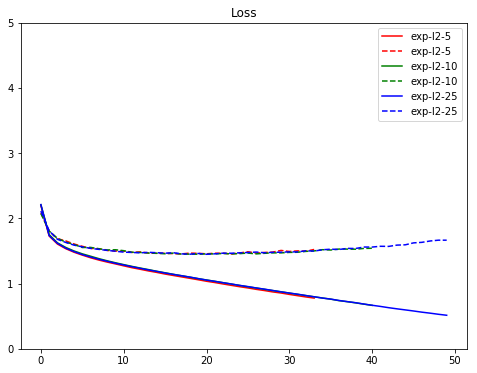

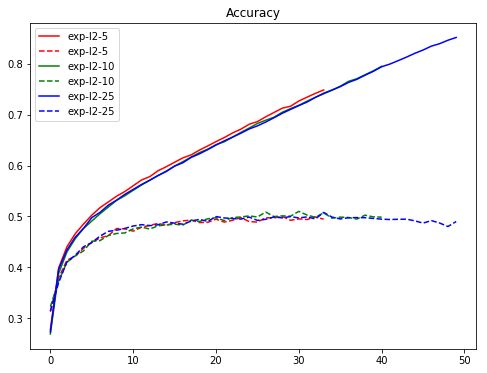

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()